<a href="https://colab.research.google.com/github/SuvirKapse/Greedygame/blob/main/suvir_greedy_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/Greedy/Copy of Q2_rewards details.csv'

Mounted at /content/drive


In [ ]:
file_path1='/content/drive/MyDrive/Greedy/Copy of Q2_User offer completion data.csv'
file_path2='/content/drive/MyDrive/Greedy/Copy of Q2_User offer data.csv'
file_path3='/content/drive/MyDrive/Greedy/Copy of Q2_users signup.csv'

In [ ]:
rewards=pd.read_csv(file_path)
user_offer_completion=pd.read_csv(file_path1)
user_offer=pd.read_csv(file_path2)
user_signup=pd.read_csv(file_path3)

In [ ]:
user_signup.head()

,user_id,app_id,signed_up_on,last_login_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26
1,7cdb9d2c-9644-42d0-8d44-50fa57747523,sikka,2022-11-26,2022-11-26
2,e2dfd115-a8b0-4e3e-96e5-9b11e5f316f1,sikka,2022-11-26,2022-11-28
3,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27
4,a6d5ed73-5c1c-4666-a592-f93ab4489cf5,sikka,2022-11-26,2022-11-26


In [ ]:
user_offer.head()

,Unnamed: 0,user_id,offer_id,status,started_at,completed_at,expires_at
0,0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00
1,1,e5c792a3-9cd9-4d10-a7b5-e5ee0f0f5fad,3462,ONGOING,2022-11-26 01:19:42.059483+00:00,NaN,2022-11-28 01:19:42.066140+00:00
2,2,033c38d4-fd46-45a2-b09a-18d637c54129,3462,ONGOING,2022-11-26 14:12:39.365453+00:00,NaN,2022-11-28 14:12:39.369689+00:00
3,3,8a488246-83d3-4028-b216-85ee8c3e504d,2328,ONGOING,2022-11-26 02:51:44.438026+00:00,NaN,2022-11-28 02:51:44.441869+00:00
4,4,aff26172-41d6-4e69-9b02-48011fe35804,3467,ONGOING,2022-11-26 11:44:25.915581+00:00,NaN,2022-11-28 11:44:25.921249+00:00


In [ ]:
rewards.head()


,Unnamed: 0,offer_id,reward_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,0,369,451,Download APK,500,0
1,1,400,488,Download,30,0
2,2,402,491,Download,500,0
3,3,447,541,Register on App,500,0
4,4,478,586,Complete Registration,500,0


In [ ]:
user_offer_completion.head()

,Unnamed: 0,reward_id,user_id,date,app_id
0,0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


# **question 1**

# **Given below is only theoretical approach as we didnt have any dataset for this question**

In [ ]:
import pandas as pd


# Load User Signup data, User offer completion data, and Rewards details tables into DataFrames
user_signup_df = pd.read_csv('user_signup_data.csv')
user_offer_completion_df = pd.read_csv('user_offer_completion_data.csv')
rewards_details_df = pd.read_csv('rewards_details.csv')

# Merge User offer completion data and Rewards details tables on offer_id
offer_reward_df = pd.merge(user_offer_completion_df, rewards_details_df, on='offer_id')

# Merge resulting table with User Signup data table on user_id
merged_df = pd.merge(offer_reward_df, user_signup_df, on='user_id')

# Group by utm_source and sum total_payout_in_paise to compute total revenue and cost
revenue_cost_df = merged_df.groupby('utm_source').agg(
    total_revenue=('total_revenue_in_paise', 'sum'),
    total_cost=('total_payout_in_paise', 'sum')
)

# Count number of users in each marketing channel
user_count_df = merged_df.groupby('utm_source').agg(user_count=('user_id', 'nunique'))

# Calculate cost of acquisition per user for each marketing channel
cac_df = revenue_cost_df.join(user_count_df).assign(
    cac=lambda x: x['total_cost'] / x['user_count']
)

# Calculate average revenue per user (ARPU) for each marketing channel
arpu_df = revenue_cost_df.join(user_count_df).assign(
    arpu=lambda x: x['total_revenue'] / x['user_count']
)

# Estimate average customer lifetime (ACL) for each marketing channel (let's assume 2 years for this example)
acl_df = pd.DataFrame({'utm_source': arpu_df.index, 'acl': [2]*len(arpu_df)})

# Calculate lifetime value (LTV) for each marketing channel
ltv_df = pd.merge(arpu_df, acl_df, on='utm_source').assign(ltv=lambda x: x['arpu'] * x['acl'])




# **question 2**

**Comparing Number of Offer Initiation by users for "sikka" & "sikka pro"**

In [ ]:
# Merge user_signup and user_offer tables
user_data = pd.merge(user_signup, user_offer, on='user_id')

# Count the number of offer initiations for each app
sikka_offer_count = user_data[user_data['app_id'] == 'sikka'].shape[0]
sikka_pro_offer_count = user_data[user_data['app_id'] == 'sikka_pro'].shape[0]

print(f"Number of offer initiations on Sikka app: {sikka_offer_count}")
print(f"Number of offer initiations on Sikka Pro app: {sikka_pro_offer_count}")

Number of offer initiations on Sikka app: 262
Number of offer initiations on Sikka Pro app: 237


**Comparing total payout for both sikka and sikka pro**

In [ ]:
# Merge the two tables on reward_id to get the total payout and revenue for each completed offer
offer_rewards = pd.merge(user_offer_completion, rewards, on='reward_id')
offer_rewards = offer_rewards[['app_id', 'total_payout_in_paise', 'total_revenue_in_paise']].groupby('app_id').sum()

# Print the total payout and revenue for each app
print(f"Total payout for Sikka app: {offer_rewards.loc['sikka', 'total_payout_in_paise'] / 100}")
print(f"Total payout for Sikka Pro app: {offer_rewards.loc['sikka_pro', 'total_payout_in_paise'] / 100}")


Total payout for Sikka app: 184.66
Total payout for Sikka Pro app: 196.18


**Comparing the rewards earned by users on both app**

In [ ]:
# Join the user_offer_completion and rewards tables on reward_id
rewards_earned = pd.merge(user_offer_completion, rewards, on='reward_id')

# Group the data by app and sum the rewards earned by users
rewards_earned_by_app = rewards_earned.groupby('app_id')['total_payout_in_paise'].sum()

print("Rewards earned by users:")
print(rewards_earned_by_app)

Rewards earned by users:
app_id
sikka        18466
sikka_pro    19618
Name: total_payout_in_paise, dtype: int64


**Comparing revenue generated by both app**

In [ ]:
# Merge the user_offer_completion and rewards tables on reward_id
merged_data = user_offer_completion.merge(rewards, on='reward_id')

# Calculate revenue for each app
sikka_revenue = merged_data[merged_data['app_id'] == 'sikka']['total_revenue_in_paise'].sum()
sikka_pro_revenue = merged_data[merged_data['app_id'] == 'sikka_pro']['total_revenue_in_paise'].sum()

print(f"Revenue generated by Sikka app: {sikka_revenue}")
print(f"Revenue generated by Sikka Pro app: {sikka_pro_revenue}")

Revenue generated by Sikka app: 39687
Revenue generated by Sikka Pro app: 40457


**From above comparision we can say sikka pro app is doing much better.**

# **question 3**

In [ ]:
path5='/content/drive/MyDrive/Greedy/Copy of Q3_Sikka data.csv'

In [ ]:
# Load the Sikka_numbers table
sikka_numbers = pd.read_csv(path5)

In [ ]:
sikka_numbers.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


In [ ]:
sikka_numbers.tail()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
41,2022-11-11,13826,4274,4512,2047,NaN
42,2022-11-12,13464,4660,4856,2066,NaN
43,2022-11-13,13415,4416,4749,2147,NaN
44,2022-11-14,13873,4097,4305,2065,NaN
45,2022-11-15,14459,4890,4593,2707,NaN


In [ ]:
from sklearn.linear_model import LinearRegression



# Filter the data to include only the relevant columns and October data
sikka_october = sikka_numbers[['Date', 'DAU', 'Referrals']].loc[sikka_numbers['Date'].str.contains('2022-10')]

# Create a linear regression model
model = LinearRegression()
model.fit(sikka_october[['DAU']], sikka_october[['Referrals']])

# Use the model to predict the number of referrals for the first 15 days of November
sikka_november = sikka_numbers[['Date', 'DAU']].loc[sikka_numbers['Date'].str.contains('2022-11')]
sikka_november['predicted_referrals'] = model.predict(sikka_november[['DAU']])
predicted_referrals = sikka_november['predicted_referrals'].sum()

print(f"Predicted number of referrals for the first 15 days of November: {predicted_referrals}")

Predicted number of referrals for the first 15 days of November: 6155.592117238766


# **question 4**

In [ ]:
path6='/content/drive/MyDrive/Greedy/Copy of Q4_ADX_Sample_data.csv'
adx_data = pd.read_csv(path6)

In [ ]:
adx_data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [ ]:
adx_data['show_rate'] = adx_data['ae_impressions'] / adx_data['ae_responses']
adx_data['click_rate'] = adx_data['ae_clicks'] / adx_data['ae_impressions']
adx_data['revenue_per_impression'] = adx_data['ae_revenue'] / adx_data['ae_impressions']
adx_data['revenue_per_request'] = adx_data['ae_revenue'] / adx_data['requests']


In [ ]:
adx_data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate,revenue_per_impression,revenue_per_request
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738,0.944444,0.000000,0.001051,0.000993
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384,0.958333,0.000000,0.002799,0.002683
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878,0.923077,0.022831,0.005644,0.005210
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836,0.758545,0.194767,0.035213,0.024082
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392,0.543554,0.128205,0.017688,0.007398


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

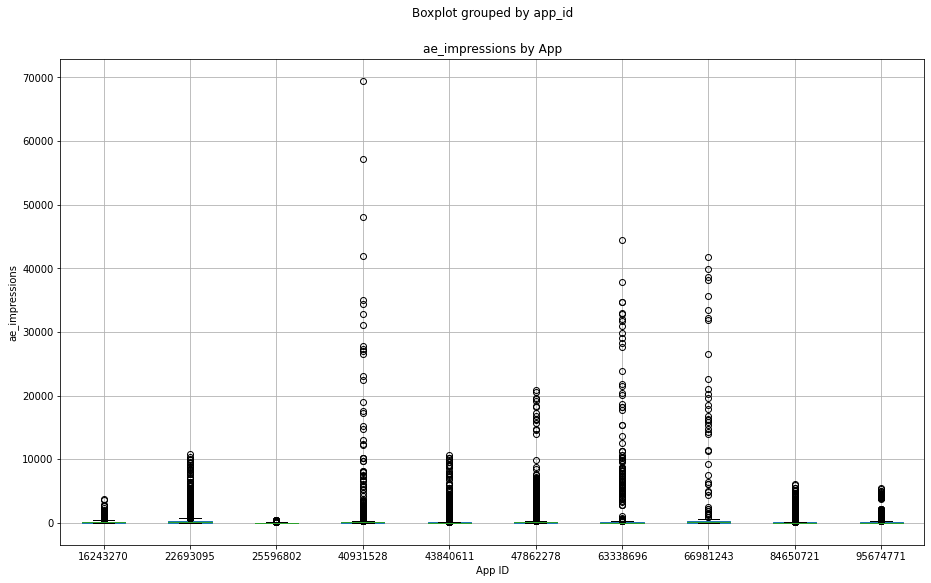

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

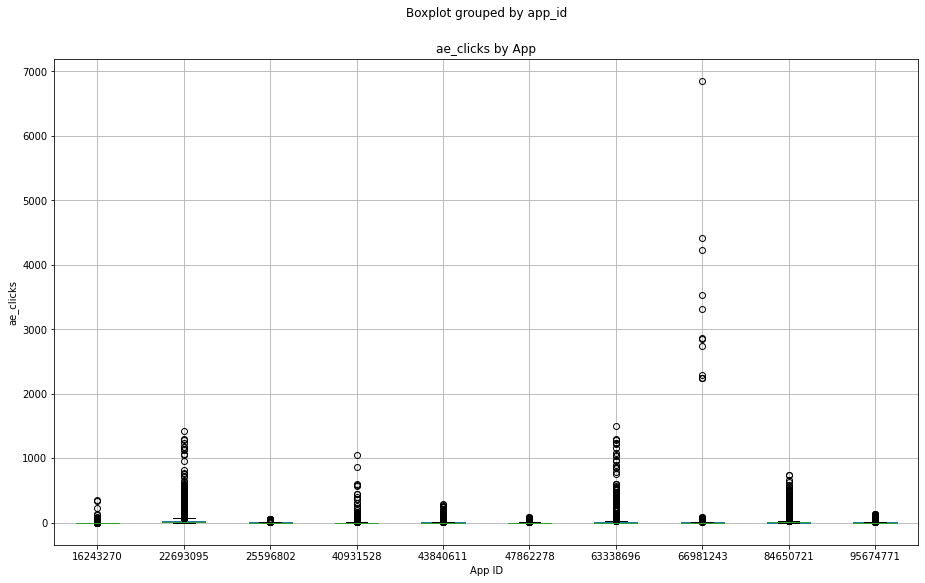

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

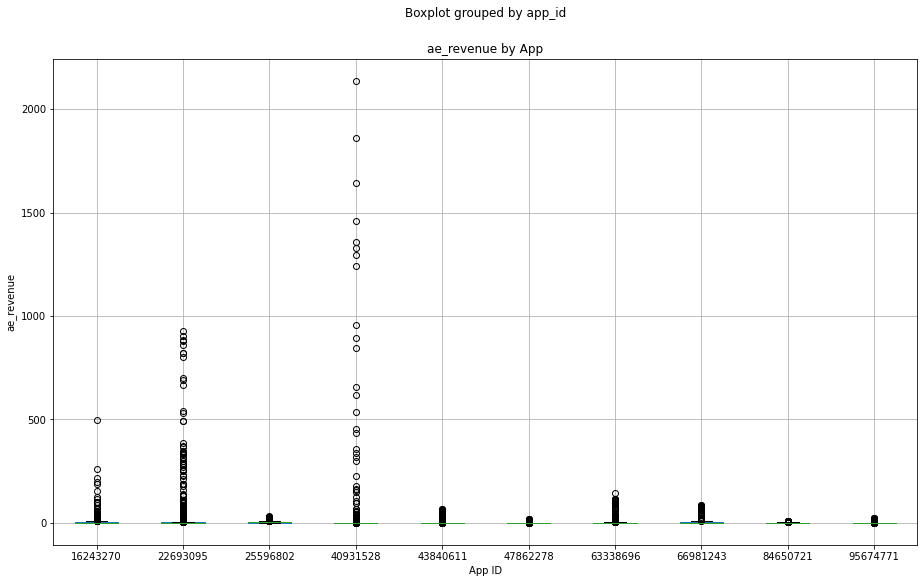

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

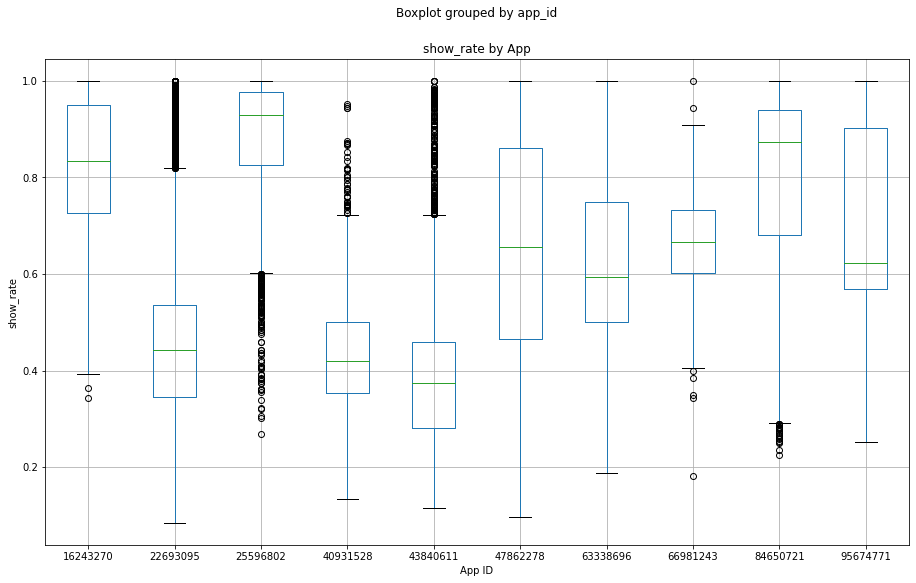

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

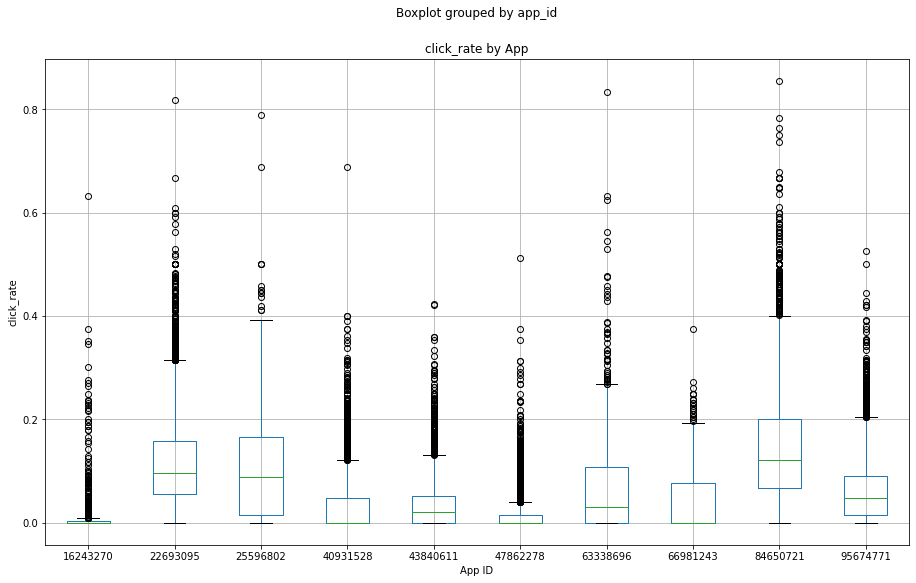

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

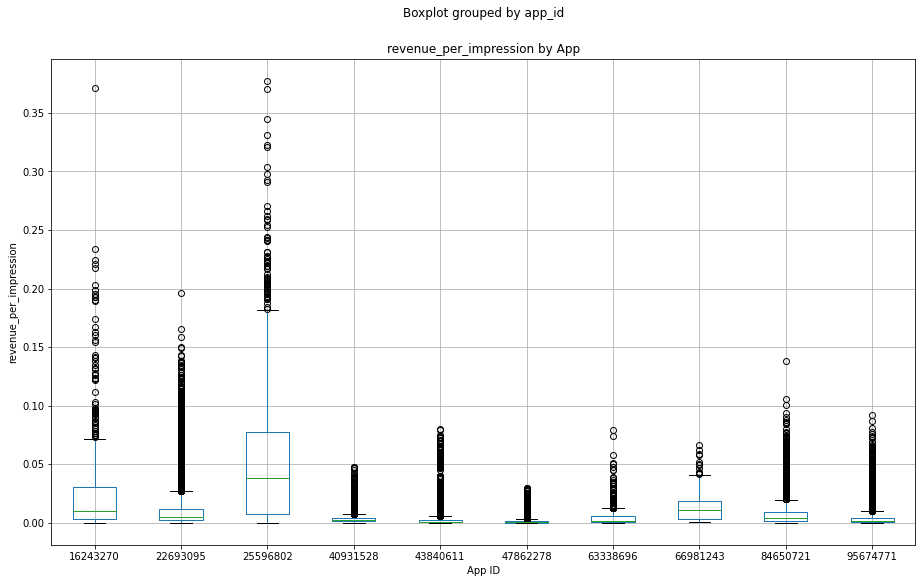

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x648 with 0 Axes>

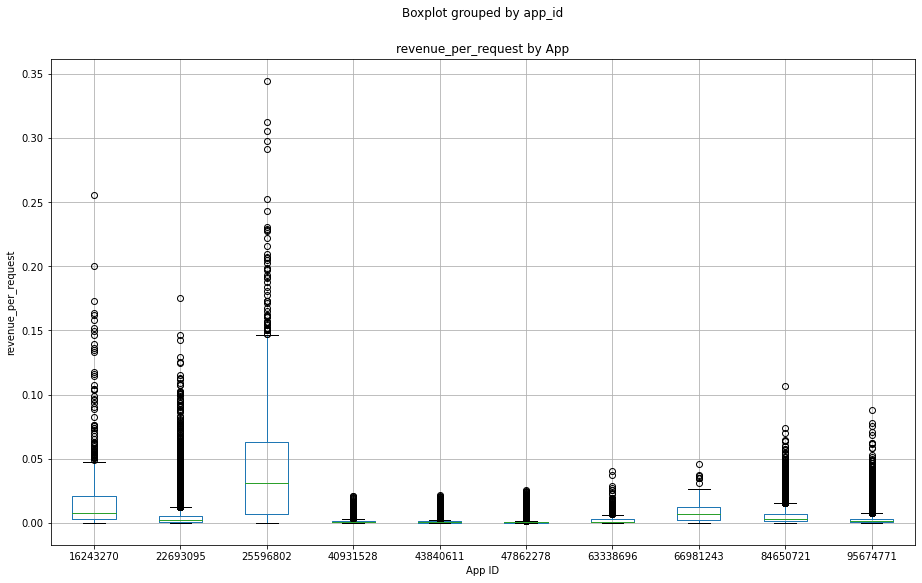

In [ ]:

# Set the figure size
fig_size = (15, 9)

# Create box plots for each metric by app ID
metrics = ['ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate', 'revenue_per_impression', 'revenue_per_request']
for metric in metrics:
    fig = plt.figure(figsize=fig_size)
    adx_data.boxplot(column=metric, by='app_id',figsize=fig_size)
    plt.title(metric + ' by App')
    plt.ylabel(metric)
    plt.xlabel('App ID')
    plt.show()

**the above graphs shows the anomaly  in the data for any of the apps present
in the sample dataset**